In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.layers import Dense, Activation
from keras.activations import elu
from tensorflow.keras.activations import tanh, sigmoid, relu, linear
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.metrics import MeanSquaredError
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Books_rating.csv')

In [ ]:
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
df.tail()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2999995,B000NSLVCU,The Idea of History,NaN,NaN,NaN,14/19,4.0,937612800,Difficult,"This is an extremely difficult book to digest,..."
2999996,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,B000NSLVCU,The Idea of History,NaN,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",1/11,5.0,1163030400,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."
2999999,B000NSLVCU,The Idea of History,NaN,NaN,NaN,7/49,1.0,905385600,Collingwood's ideas sink in a quagmire or verb...,"The guy has a few good ideas but, reader, bewa..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [ ]:
df.describe()

,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [ ]:
label_encoder = LabelEncoder()
df['Id'] = label_encoder.fit_transform(df['Id'])

In [ ]:
df = df.drop(['review/time'], axis = 1)

In [ ]:
df = df.drop(['profileName'], axis = 1)

In [ ]:
df = df.drop(['User_id'], axis = 1)

In [ ]:
df = df.drop(['review/text'],axis = 1)

In [ ]:

df = df.drop(['Title'],axis = 1)

In [ ]:
df = df.drop(['Price'],axis = 1)

In [ ]:
df

,Id,review/helpfulness,review/score,review/summary
0,130707,7/7,4.0,Nice collection of Julie Strain images
1,74269,10/10,5.0,Really Enjoyed It
2,74269,10/11,5.0,Essential for every personal and Public Library
3,74269,7/7,4.0,Phlip Nel gives silly Seuss a serious treatment
4,74269,3/3,4.0,Good academic overview
...,...,...,...,...
2999995,210845,14/19,4.0,Difficult
2999996,210845,1/1,4.0,Quite good and ahead of its time occasionally
2999997,210845,0/0,4.0,Easier reads of those not well versed in histo...
2999998,210845,1/11,5.0,"Yes, it is cheaper than the University Bookstore"


In [ ]:
def fraction_to_percentage(fraction):
    numerator, denominator = map(int, fraction.split('/'))
    if(denominator == 0):
        return 0
    else:
        return (numerator / denominator) * 100

In [ ]:
df['review/helpfulness'] = df['review/helpfulness'].apply(fraction_to_percentage)

In [ ]:
df['review/helpfulness'] = df['review/helpfulness'].astype(int)

In [ ]:

df['review/summary'].isnull().sum()

38

In [ ]:
df['review/summary'].fillna("No Review", inplace=True)

In [ ]:
df['review/summary'].isnull().sum()

0

In [ ]:
sentences = df['review/summary']

In [ ]:
print(df['review/summary'].dtype)

object


In [ ]:
print(sentences)

0                     Nice collection of Julie Strain images
1                                          Really Enjoyed It
2            Essential for every personal and Public Library
3            Phlip Nel gives silly Seuss a serious treatment
4                                     Good academic overview
                                 ...                        
2999995                                            Difficult
2999996        Quite good and ahead of its time occasionally
2999997    Easier reads of those not well versed in histo...
2999998     Yes, it is cheaper than the University Bookstore
2999999    Collingwood's ideas sink in a quagmire or verb...
Name: review/summary, Length: 3000000, dtype: object


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment_scores = [sentiment_analyzer.polarity_scores(sentence)['compound'] for sentence in sentences]

In [ ]:
df['sentiment_scores'] = sentiment_scores

In [ ]:
df['sentiment_scores'].isnull().sum()

0

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['review/summary'])

In [ ]:
average_scores = []
for i in tqdm(range(len(df))):
    sentence = df['review/summary'].iloc[i]
    tfidf_indices = [tfidf_vectorizer.vocabulary_[word] for word in sentence.split() if word in tfidf_vectorizer.vocabulary_]
    tfidf_scores = X_tfidf[i, tfidf_indices].toarray().flatten()
    average_score = np.mean(tfidf_scores)
    average_scores.append(average_score)

  0%|          | 0/3000000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 3000000/3000000 [19:34<00:00, 2554.78it/s]


In [ ]:
df['average_tfidf_score'] = average_scores

In [ ]:
df['average_tfidf_score'] = df['average_tfidf_score'].fillna(0.1)

In [ ]:
df['average_tfidf_score'].isnull().sum()

0

In [ ]:
df

,Id,review/helpfulness,review/score,review/summary,sentiment_scores,average_tfidf_score
0,130707,100,4.0,Nice collection of Julie Strain images,0.3818,0.321476
1,74269,100,5.0,Really Enjoyed It,0.5563,0.100000
2,74269,90,5.0,Essential for every personal and Public Library,0.0000,0.299751
3,74269,100,4.0,Phlip Nel gives silly Seuss a serious treatment,-0.0516,0.290672
4,74269,100,4.0,Good academic overview,0.4404,0.667842
...,...,...,...,...,...,...
2999995,210845,73,4.0,Difficult,-0.3612,0.100000
2999996,210845,100,4.0,Quite good and ahead of its time occasionally,0.4927,0.318652
2999997,210845,0,4.0,Easier reads of those not well versed in histo...,0.2467,0.292694
2999998,210845,9,5.0,"Yes, it is cheaper than the University Bookstore",0.4019,0.246968


In [ ]:
print(X_tfidf)

  (0, 59170)	0.4638928435588567
  (0, 114559)	0.545068787450919
  (0, 64868)	0.4912488590334693
  (0, 84709)	0.15251142467987033
  (0, 24397)	0.3480246309620461
  (0, 82475)	0.31936989013653955
  (1, 63046)	0.3807264137556986
  (1, 39428)	0.7220590840282494
  (1, 98279)	0.5776487488439754
  (2, 69871)	0.4247811587646249
  (2, 95679)	0.5031760792457854
  (2, 6318)	0.19353795009390362
  (2, 89763)	0.4273313205673145
  (2, 41292)	0.3719164782391286
  (2, 46248)	0.2062174940227622
  (2, 40729)	0.4067656366290572
  (3, 122608)	0.30621521112309946
  (3, 107020)	0.2640060041927818
  (3, 107182)	0.3405701545936893
  (3, 109068)	0.29902854435457416
  (3, 50078)	0.29343800245462004
  (3, 81905)	0.5220254363551904
  (3, 90438)	0.5220254363551904
  (4, 87024)	0.6018008661732737
  (4, 2837)	0.7338825463783886
  :	:
  (2999996, 84709)	0.1668696862362964
  (2999997, 127969)	0.5309137320000314
  (2999997, 56180)	0.47522477586407863
  (2999997, 98169)	0.340002863803517
  (2999997, 120101)	0.29075192853

In [ ]:
def batch_pad_sequences(sequences, maxlen, batch_size):
    num_samples = sequences.shape[0]  # Use shape[0]
    num_batches = (num_samples + batch_size - 1) // batch_size
    padded_sequences = []
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, num_samples)  # Use num_samples
        batch_sequences = sequences[start_idx:end_idx]
        padded_batch = pad_sequences(batch_sequences.toarray(), maxlen=maxlen)  # Convert to dense array
        padded_sequences.extend(padded_batch)
    return np.array(padded_sequences)

In [ ]:
df

,Id,review/helpfulness,review/score,review/summary,sentiment_scores,average_tfidf_score
0,130707,100,4.0,Nice collection of Julie Strain images,0.3818,0.321476
1,74269,100,5.0,Really Enjoyed It,0.5563,0.100000
2,74269,90,5.0,Essential for every personal and Public Library,0.0000,0.299751
3,74269,100,4.0,Phlip Nel gives silly Seuss a serious treatment,-0.0516,0.290672
4,74269,100,4.0,Good academic overview,0.4404,0.667842
...,...,...,...,...,...,...
2999995,210845,73,4.0,Difficult,-0.3612,0.100000
2999996,210845,100,4.0,Quite good and ahead of its time occasionally,0.4927,0.318652
2999997,210845,0,4.0,Easier reads of those not well versed in histo...,0.2467,0.292694
2999998,210845,9,5.0,"Yes, it is cheaper than the University Bookstore",0.4019,0.246968


In [ ]:
df1 = df.drop(['review/score'],axis = 1)

In [ ]:
df1

,Id,review/helpfulness,review/summary,sentiment_scores,average_tfidf_score
0,130707,100,Nice collection of Julie Strain images,0.3818,0.321476
1,74269,100,Really Enjoyed It,0.5563,0.100000
2,74269,90,Essential for every personal and Public Library,0.0000,0.299751
3,74269,100,Phlip Nel gives silly Seuss a serious treatment,-0.0516,0.290672
4,74269,100,Good academic overview,0.4404,0.667842
...,...,...,...,...,...
2999995,210845,73,Difficult,-0.3612,0.100000
2999996,210845,100,Quite good and ahead of its time occasionally,0.4927,0.318652
2999997,210845,0,Easier reads of those not well versed in histo...,0.2467,0.292694
2999998,210845,9,"Yes, it is cheaper than the University Bookstore",0.4019,0.246968


In [ ]:
df1 = df1.drop(['review/summary'],axis = 1)

In [ ]:
df1

,Id,review/helpfulness,sentiment_scores,average_tfidf_score
0,130707,100,0.3818,0.321476
1,74269,100,0.5563,0.100000
2,74269,90,0.0000,0.299751
3,74269,100,-0.0516,0.290672
4,74269,100,0.4404,0.667842
...,...,...,...,...
2999995,210845,73,-0.3612,0.100000
2999996,210845,100,0.4927,0.318652
2999997,210845,0,0.2467,0.292694
2999998,210845,9,0.4019,0.246968


In [ ]:
df1

,Id,review/helpfulness,sentiment_scores,average_tfidf_score
0,130707,100,0.3818,0.321476
1,74269,100,0.5563,0.100000
2,74269,90,0.0000,0.299751
3,74269,100,-0.0516,0.290672
4,74269,100,0.4404,0.667842
...,...,...,...,...
2999995,210845,73,-0.3612,0.100000
2999996,210845,100,0.4927,0.318652
2999997,210845,0,0.2467,0.292694
2999998,210845,9,0.4019,0.246968


In [ ]:
helpfulness = df1['review/helpfulness']
helpfulness_reshaped = (helpfulness - helpfulness.min()) / (helpfulness.max() - helpfulness.min())
df1['review/helpfulness'] = helpfulness_reshaped

In [ ]:
helpfulnesss = df1['Id']
helpfulnesss_reshaped = (helpfulnesss - helpfulnesss.min()) / (helpfulnesss.max() - helpfulnesss.min())
df1['Id'] = helpfulness_reshaped

In [ ]:
df

,Id,review/helpfulness,review/score,review/summary,sentiment_scores,average_tfidf_score
0,130707,100,4.0,Nice collection of Julie Strain images,0.3818,0.321476
1,74269,100,5.0,Really Enjoyed It,0.5563,0.100000
2,74269,90,5.0,Essential for every personal and Public Library,0.0000,0.299751
3,74269,100,4.0,Phlip Nel gives silly Seuss a serious treatment,-0.0516,0.290672
4,74269,100,4.0,Good academic overview,0.4404,0.667842
...,...,...,...,...,...,...
2999995,210845,73,4.0,Difficult,-0.3612,0.100000
2999996,210845,100,4.0,Quite good and ahead of its time occasionally,0.4927,0.318652
2999997,210845,0,4.0,Easier reads of those not well versed in histo...,0.2467,0.292694
2999998,210845,9,5.0,"Yes, it is cheaper than the University Bookstore",0.4019,0.246968


In [ ]:
help = df['review/score']
help_reshaped = (help - help.min()) / (help.max() - help.min())
df['review/score'] = help_reshaped

In [ ]:
X = df1
y = df['review/score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(2400000, 4)

In [ ]:
y_train

1365133    0.5
1977417    1.0
2903808    1.0
2950722    1.0
2580244    0.5
          ... 
2919807    0.0
1130845    1.0
2433990    1.0
1496235    0.5
1667302    1.0
Name: review/score, Length: 2400000, dtype: float64

In [ ]:

input_dim = df1.shape[1]

In [ ]:
X_train.shape

(2400000, 4)

In [ ]:
class LossPlotCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs=None):
        # Evaluate on the validation set
        val_loss = self.model.evaluate(self.X_val, self.y_val, verbose=0)

        # Record losses for plotting
        self.train_losses.append(logs['loss'])
        self.val_losses.append(val_loss)

        # Plot the losses
        plt.figure()
        plt.plot(self.train_losses, label='Training Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [ ]:
callback = LossPlotCallback(X_test,y_test)

In [ ]:
# model = Sequential()
# model.add(Dense(128, input_dim=input_dim))
# model.add(Activation(tanh))  # Use ELU activation function
# model.add(Dense(32))
# model.add(Activation(tanh))
# model.add(Dense(16))
# model.add(Activation(elu))
# model.add(Dense(1, activation='linear'))
# model.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               640       
                                                                 
 dense_11 (Dense)            (None, 16)                2064      
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2721 (10.63 KB)
Trainable params: 2721 (10.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20,batch_size = 64, validation_split=0.2)

Epoch 1/20
30000/30000 [==============================] - 93s 3ms/step - loss: 0.0919 - accuracy: 0.6023 - val_loss: 0.0906 - val_accuracy: 0.6026
Epoch 2/20
30000/30000 [==============================] - 92s 3ms/step - loss: 0.0905 - accuracy: 0.6023 - val_loss: 0.0906 - val_accuracy: 0.6026
Epoch 3/20
30000/30000 [==============================] - 96s 3ms/step - loss: 0.0905 - accuracy: 0.6023 - val_loss: 0.0906 - val_accuracy: 0.6026
Epoch 4/20
30000/30000 [==============================] - 86s 3ms/step - loss: 0.0905 - accuracy: 0.6023 - val_loss: 0.0907 - val_accuracy: 0.6026
Epoch 5/20
30000/30000 [==============================] - 84s 3ms/step - loss: 0.0905 - accuracy: 0.6023 - val_loss: 0.0906 - val_accuracy: 0.6026
Epoch 6/20
30000/30000 [==============================] - 94s 3ms/step - loss: 0.0905 - accuracy: 0.6023 - val_loss: 0.0906 - val_accuracy: 0.6026
Epoch 7/20
30000/30000 [==============================] - 85s 3ms/step - loss: 0.0905 - accuracy: 0.6023 - val_loss: 0

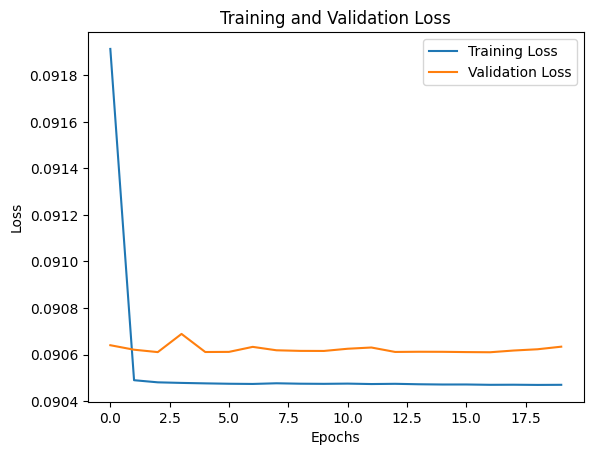

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

18750/18750 [==============================] - 36s 2ms/step - loss: 0.0904 - accuracy: 0.6029
Test Loss: [0.09036604315042496, 0.602869987487793]


In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
predictions = model.predict(X_test)
print(predictions[:])

18750/18750 [==============================] - 38s 2ms/step
[[0.8088]
 [0.8088]
 [0.8088]
 ...
 [0.8088]
 [0.8088]
 [0.8088]]


In [ ]:
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

binary_predictions = np.where(predictions >= 0.5, 1, 0)
binary_y_test = np.where(y_test >= 0.5, 1, 0)

accuracy = accuracy_score(binary_y_test, binary_predictions)
precision = precision_score(binary_y_test, binary_predictions)
recall = recall_score(binary_y_test, binary_predictions)
f1 = f1_score(binary_y_test, binary_predictions)
roc_auc = roc_auc_score(binary_y_test, predictions)
mse = mean_squared_error(y_test, predictions)
conf_matrix = confusion_matrix(binary_y_test, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Mean Squared Error:", mse)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.88285
Precision: 0.88285
Recall: 1.0
F1 Score: 0.9377804923387418
ROC AUC Score: 0.5
Mean Squared Error: 0.09036624549625112
Confusion Matrix:
[[     0  70290]
 [     0 529710]]
